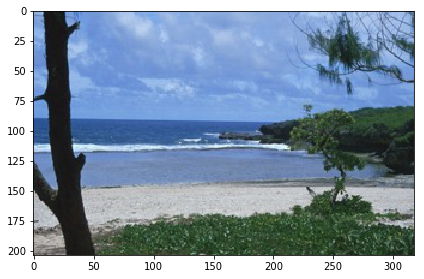

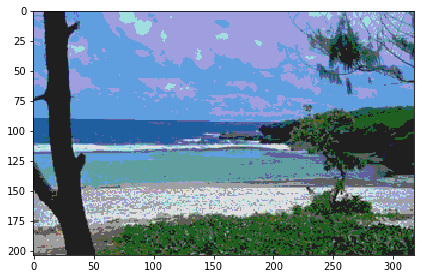

In [15]:
from skimage import io
import matplotlib.pyplot as plt
import math

def posterize(img):
    rows,cols,dims = img.shape
    for i in range(0,rows):
        for j in range(0,cols):
            for k in range(0,3):
                color = img[i,j,k]
                img[i,j,k] = math.floor(color/64)*64+31
    return img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/scene.jpg')
io.imshow(img)

img2 = posterize(img)
plt.figure()
io.imshow(img2)
io.show()

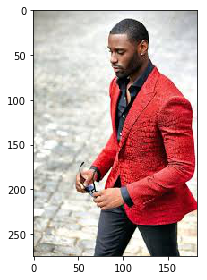

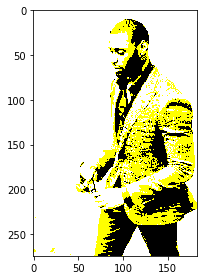

In [16]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def reduceThree(img):
    rows,cols,dims = img.shape
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            lumi = 0
            for k in range(0,3):
                lumi = lumi + img[i,j,k]
            lumi = lumi/3
            if lumi < 64:
                ret_img[i,j,0] = 0
                ret_img[i,j,1] = 0
                ret_img[i,j,2] = 0
            elif lumi > 120:
                ret_img[i,j,0] = 255
                ret_img[i,j,1] = 255
                ret_img[i,j,2] = 255
            else:
                ret_img[i,j,0] = 255
                ret_img[i,j,1] = 255
                ret_img[i,j,2] = 0
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/black_man.jpg')
io.imshow(img)

img2 = reduceThree(img)
plt.figure()
io.imshow(img2)
io.show()

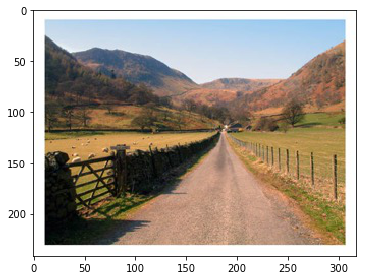

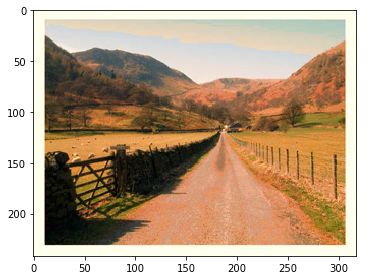

In [18]:
from skimage import io
import matplotlib.pyplot as plt
import math

def sepia(img):
    rows,cols,dims = img.shape
    for i in range(0,rows):
        for j in range(0,cols):
            red = img[i,j,0]
            blue = img[i,j,2]
            
            if red<63:
                red = red*1.1
                blue=blue*0.9
            if red>62 and red<192:
                red = red*1.15
                blue = blue*0.85
            if red>191:
                red = red*1.08
            if red>255:
                red = 255
                
            blue = blue*0.93
            
            img[i,j,0] = red
            img[i,j,2] = blue
            
    return img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/road.jpg')
io.imshow(img)

img2 = sepia(img)
plt.figure()
io.imshow(img2)
io.show()


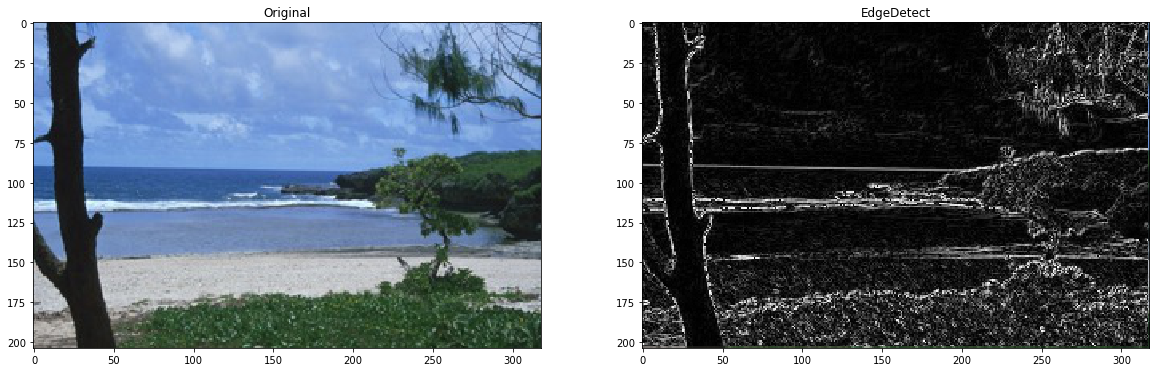

In [19]:
from skimage import io
import matplotlib.pyplot as plt

def edgedetect(img):
    rows,cols,dims = img.shape
    for i in range(0,rows-1):
        for j in range(0,cols-1):
            sum = 0
            sum_rightBottom = 0
            for k in range(0,3):
                sum = sum + img[i,j,k]
                sum_rightBottom = sum_rightBottom + img[i+1,j+1,k]
            dif = abs(sum_rightBottom-sum)
            
            for k in range(0,3):
                img[i,j,k] = dif
    return img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/scene.jpg')
plt.figure(num='scene',figsize=(20,20))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)

img2 = edgedetect(img)
plt.subplot(1,2,2)
plt.title('EdgeDetect')
plt.imshow(img2)
plt.show()

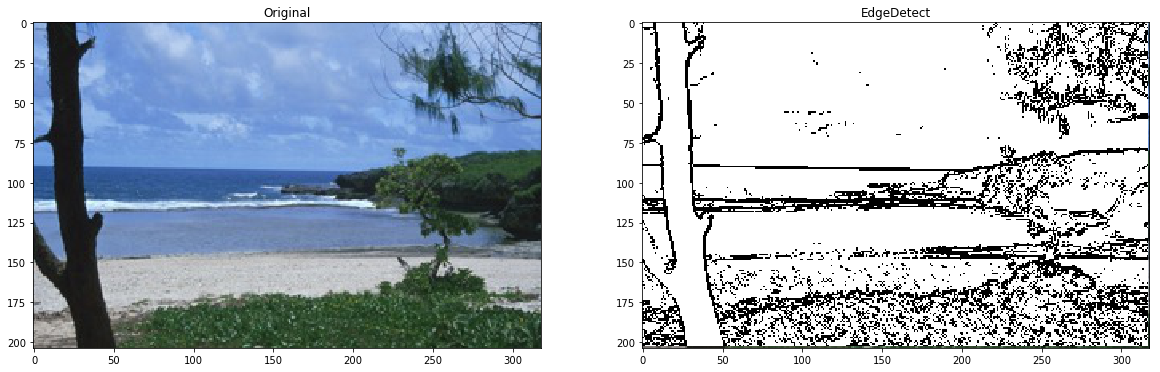

In [25]:
from skimage import io
import matplotlib.pyplot as plt

def edgeDetect(img,thresh):
    rows,cols,dims = img.shape
    for i in range(0,rows-1):
        for j in range(0,cols-1):
            sum = 0
            sum_rB = 0
            for k in range(0,3):
                sum = sum + img[i,j,k]
                sum_rB = sum_rB + img[i+1,j+1,k]
            dif = abs(sum_rB-sum)
            if dif > thresh:
                value = 0
            else:
                value = 255
            for k in range(0,3):
                img[i,j,k] = value
    return img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/scene.jpg')
thresh = 50

plt.figure(num='scene',figsize=(20,20))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)

img2 = edgeDetect(img,thresh)

plt.subplot(1,2,2)
plt.title('EdgeDetect')
plt.imshow(img2)
plt.show()